# MTE 203 Applications of Advanced Calculus

## Prerequisites

In [863]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn import preprocessing

In [864]:
def percentError(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [865]:
FILE_PATH = '../data/nbaBettingData.csv'
nbaDf = pd.read_csv(FILE_PATH)

## Data Cleaning / Engineering

In [866]:
totalPts = nbaDf.PTS_home + nbaDf.PTS_away
nbaDf["PTS_total"] = totalPts

In [867]:
nbaDf["GAME_DATE_EST"] = pd.to_datetime(nbaDf["GAME_DATE_EST"], infer_datetime_format=True)
nbaDf.sort_values(by=['GAME_DATE_EST'], inplace=True, ascending=False)
nbaDf = nbaDf.reset_index()

/var/folders/19/48sc_t714fz_96wrj2kckpy80000gn/T/ipykernel_43337/1264114240.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  nbaDf["GAME_DATE_EST"] = pd.to_datetime(nbaDf["GAME_DATE_EST"], infer_datetime_format=True)


In [868]:
encoder = preprocessing.OneHotEncoder()

ohe_home = encoder.fit_transform(nbaDf[["HOME_TEAM_ID"]]).toarray()
ohe_away = encoder.fit_transform(nbaDf[["VISITOR_TEAM_ID"]]).toarray()
nbaDf["SEASON"] = nbaDf["SEASON"] - 2010

ohe_home

/Users/danielrh/miniconda3/envs/MTE203/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/danielrh/miniconda3/envs/MTE203/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/danielrh/miniconda3/envs/MTE203/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/danielrh/miniconda3/envs/MTE203/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [869]:
nbaDf.columns

Index(['index', 'GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS', 'PTS_total'],
      dtype='object')

In [870]:
nbaDf.drop(['TEAM_ID_home', 'TEAM_ID_away', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID', "GAME_STATUS_TEXT", "GAME_DATE_EST", "GAME_ID", "index"], axis=1, inplace=True)

In [871]:
nbaDf

,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,PTS_total
0,12,126.0,0.484,0.926,0.382,25.0,46.0,117.0,0.478,0.815,0.321,23.0,44.0,1,243.0
1,12,120.0,0.488,0.952,0.457,16.0,40.0,112.0,0.561,0.765,0.333,20.0,37.0,1,232.0
2,12,114.0,0.482,0.786,0.313,22.0,37.0,106.0,0.470,0.682,0.433,20.0,46.0,1,220.0
3,12,110.0,0.466,0.647,0.395,22.0,49.0,116.0,0.451,0.697,0.297,19.0,45.0,0,226.0
4,12,126.0,0.506,0.913,0.469,29.0,48.0,105.0,0.402,0.759,0.290,25.0,40.0,1,231.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26646,-7,104.0,0.506,0.677,0.455,26.0,45.0,86.0,0.380,0.852,0.188,19.0,37.0,1,190.0
26647,-7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
26648,-7,104.0,0.527,0.657,0.429,22.0,33.0,80.0,0.470,0.667,0.333,10.0,37.0,1,184.0
26649,-7,105.0,0.494,0.618,0.267,25.0,48.0,94.0,0.427,0.700,0.154,20.0,43.0,1,199.0


In [872]:
ohe_home_df = pd.DataFrame(ohe_home)
ohe_away_df = pd.DataFrame(ohe_away)
nbaDf = pd.concat([nbaDf,ohe_home_df], axis=1)
nbaDf = pd.concat([nbaDf,ohe_away_df], axis=1)
print(nbaDf.shape)

(26651, 75)


In [873]:
nbaDf

,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,...,20,21,22,23,24,25,26,27,28,29
0,12,126.0,0.484,0.926,0.382,25.0,46.0,117.0,0.478,0.815,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12,120.0,0.488,0.952,0.457,16.0,40.0,112.0,0.561,0.765,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,12,114.0,0.482,0.786,0.313,22.0,37.0,106.0,0.470,0.682,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12,110.0,0.466,0.647,0.395,22.0,49.0,116.0,0.451,0.697,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12,126.0,0.506,0.913,0.469,29.0,48.0,105.0,0.402,0.759,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26646,-7,104.0,0.506,0.677,0.455,26.0,45.0,86.0,0.380,0.852,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26647,-7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26648,-7,104.0,0.527,0.657,0.429,22.0,33.0,80.0,0.470,0.667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26649,-7,105.0,0.494,0.618,0.267,25.0,48.0,94.0,0.427,0.700,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [874]:
# Python
nbaDf.columns = nbaDf.columns.astype(str)
nbaDf = nbaDf.dropna()

In [875]:
nbaDf

,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,...,20,21,22,23,24,25,26,27,28,29
0,12,126.0,0.484,0.926,0.382,25.0,46.0,117.0,0.478,0.815,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12,120.0,0.488,0.952,0.457,16.0,40.0,112.0,0.561,0.765,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,12,114.0,0.482,0.786,0.313,22.0,37.0,106.0,0.470,0.682,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12,110.0,0.466,0.647,0.395,22.0,49.0,116.0,0.451,0.697,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12,126.0,0.506,0.913,0.469,29.0,48.0,105.0,0.402,0.759,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26645,-7,96.0,0.391,0.600,0.444,19.0,37.0,100.0,0.494,0.690,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26646,-7,104.0,0.506,0.677,0.455,26.0,45.0,86.0,0.380,0.852,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26648,-7,104.0,0.527,0.657,0.429,22.0,33.0,80.0,0.470,0.667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26649,-7,105.0,0.494,0.618,0.267,25.0,48.0,94.0,0.427,0.700,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 

## Train Test Split

In [876]:
y = nbaDf["PTS_total"]
nbaDf = nbaDf.drop(columns=['PTS_total', 'PTS_home', 'PTS_away'])

test = len(nbaDf) - int(len(nbaDf)*0.8)

X_train = nbaDf.iloc[test:]
X_valid = nbaDf.iloc[:test]
y_train = y.iloc[test:]
y_valid = y.iloc[:test]

In [877]:
X_train

,SEASON,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,...,20,21,22,23,24,25,26,27,28,29
5311,8,0.524,0.839,0.355,34.0,45.0,0.544,0.563,0.379,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5312,8,0.484,0.900,0.487,28.0,47.0,0.419,0.625,0.421,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5313,8,0.471,0.800,0.417,38.0,51.0,0.480,0.645,0.353,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5314,8,0.494,0.844,0.441,24.0,43.0,0.538,0.556,0.313,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5315,8,0.578,0.792,0.455,25.0,47.0,0.357,0.708,0.323,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26645,-7,0.391,0.600,0.444,19.0,37.0,0.494,0.690,0.667,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26646,-7,0.506,0.677,0.455,26.0,45.0,0.380,0.852,0.188,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26648,-7,0.527,0.657,0.429,22.0,33.0,0.470,0.667,0.333,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26649,-7,0.494,0.618,0.267,25.0,48.0,0.427,0.700,0.154,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [878]:
nan_values = X_train.isna().sum()
nan_values

SEASON          0
FG_PCT_home     0
FT_PCT_home     0
FG3_PCT_home    0
AST_home        0
               ..
25              0
26              0
27              0
28              0
29              0
Length: 72, dtype: int64

## MLP Regression

In [879]:
regr = MLPRegressor(activation='relu', solver='adam', max_iter=1000, random_state=30).fit(
    X_train, y_train
)

pred_mlp = regr.predict(X_valid)
mae_regr = mean_absolute_error(y_valid, pred_mlp)
r2 = r2_score(y_valid, pred_mlp)

/Users/danielrh/miniconda3/envs/MTE203/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/danielrh/miniconda3/envs/MTE203/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/danielrh/miniconda3/envs/MTE203/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/danielrh/miniconda3/envs/MTE203/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated

## Analysis of Results

In [880]:
print("mae",mae_regr)
print("R^2", r2)
print("Percent Error", percentError(y_valid, pred_mlp))

mae 9.697454572784476
R^2 0.6271744626996125
Percent Error 4.298394900021622


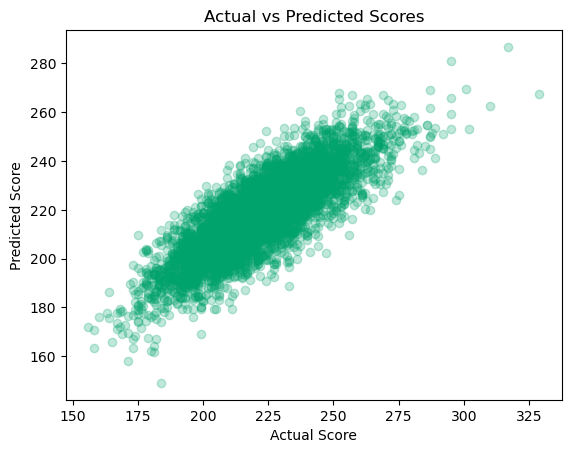

In [881]:
import matplotlib.pyplot as plt

plt.scatter(y_valid, pred_mlp, marker="o", alpha=0.25, color="#00A36C")
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Actual vs Predicted Scores')
plt.show()


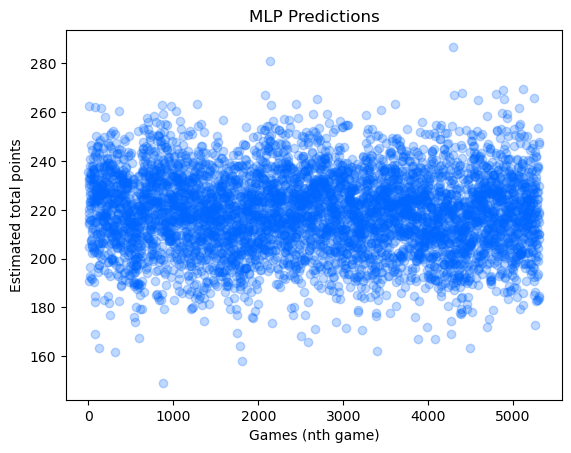

<Figure size 640x480 with 0 Axes>

In [882]:
plt.style.context("ggplot")
plt.scatter(range(len(pred_mlp)), pred_mlp, marker="o", alpha=0.25,color = "#0066ff")
plt.xlabel("Games (nth game)")
plt.ylabel("Estimated total points")
plt.title("MLP Predictions")
fig6 = plt.figure();

Average Error of model: -4.036147500172655


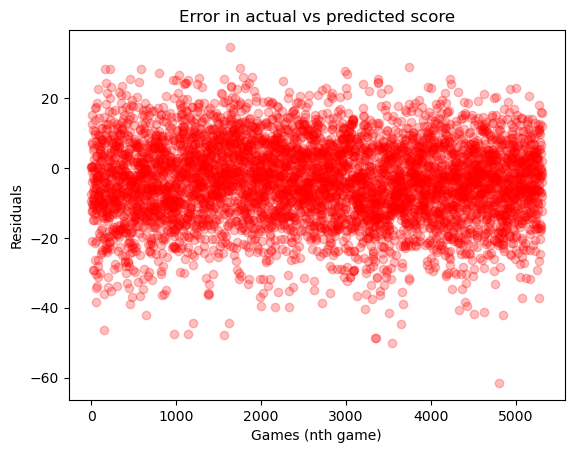

<Figure size 640x480 with 0 Axes>

In [883]:
residuals = []
for i in range(len(pred_mlp)):
    residuals.append((pred_mlp[i] - y_valid.iloc[i]))
print ("Average Error of model:",sum(residuals)/len(residuals))
plt.style.context("ggplot")
plt.scatter(range(len(residuals)), residuals, marker="o", alpha=0.25, color="#ff0000")
plt.xlabel("Games (nth game)")
plt.ylabel("Residuals")
plt.title("Error in actual vs predicted score")
fig7 = plt.figure();